In [9]:
source("Conf.R")
source("Utilities.R")
source("DAVID_query.R")
library("factoextra")
library("maptree")
library("ggpubr")
library(NMF)
library("ComplexHeatmap")
library("data.table")
library(repr)
library("pheatmap")
library(RColorBrewer)
fileDir = "/home/beraslan/jovian-work/analysisSingle/"

In [10]:
CombCounts <- read.csv(paste0(fileDir,"/outputs/anndata/fBarMat_grouped_ALLKO_forSCVI.csv"), row.names = 1, stringsAsFactors = FALSE)

In [11]:
head(CombCounts)

,G_0,G_1,G_2,G_3,G_4,G_5,G_CONTROL
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
AAACGAAAGCAGTCTT-1-E3-1-0,0,1,0,0,0,0,0
AAACGAATCTCAACCC-1-E3-1-0,0,0,0,1,0,0,0
AAACGCTAGTTGTAGA-1-E3-1-0,0,0,0,0,0,0,1
AAACGCTCAAAGACGC-1-E3-1-0,1,0,0,0,0,0,0
AAACGCTCAGTGTACT-1-E3-1-0,0,0,1,0,0,0,0
AAAGAACAGCGAGTCA-1-E3-1-0,0,1,0,0,0,0,0


In [12]:
CombCounts <- CombCounts[rowSums(CombCounts)<3,]

In [13]:
dim(CombCounts)

[1] 131125      7

In [16]:
kk <- matrix(0,nrow = 7, ncol = 7)
colnames(kk) = c(paste0("G_",0:5),"G_CONTROL")
rownames(kk) = c(paste0("G_",0:5),"G_CONTROL")

print(kk)
for(i in 1:nrow(CombCounts)){
    if(sum(CombCounts[i,]) > 1){
        gr = colnames(CombCounts)[which(CombCounts[i,] == 1)]
        kk[gr[1],gr[2]] = (kk[gr[1],gr[2]]+1)
        kk[gr[2],gr[1]] = (kk[gr[2],gr[1]]+1)
    }else{
        gr = colnames(CombCounts)[which(CombCounts[i,] == 1)]
        kk[gr,gr] = (kk[gr,gr]+1)
    }
    
}

          G_0 G_1 G_2 G_3 G_4 G_5 G_CONTROL
G_0         0   0   0   0   0   0         0
G_1         0   0   0   0   0   0         0
G_2         0   0   0   0   0   0         0
G_3         0   0   0   0   0   0         0
G_4         0   0   0   0   0   0         0
G_5         0   0   0   0   0   0         0
G_CONTROL   0   0   0   0   0   0         0


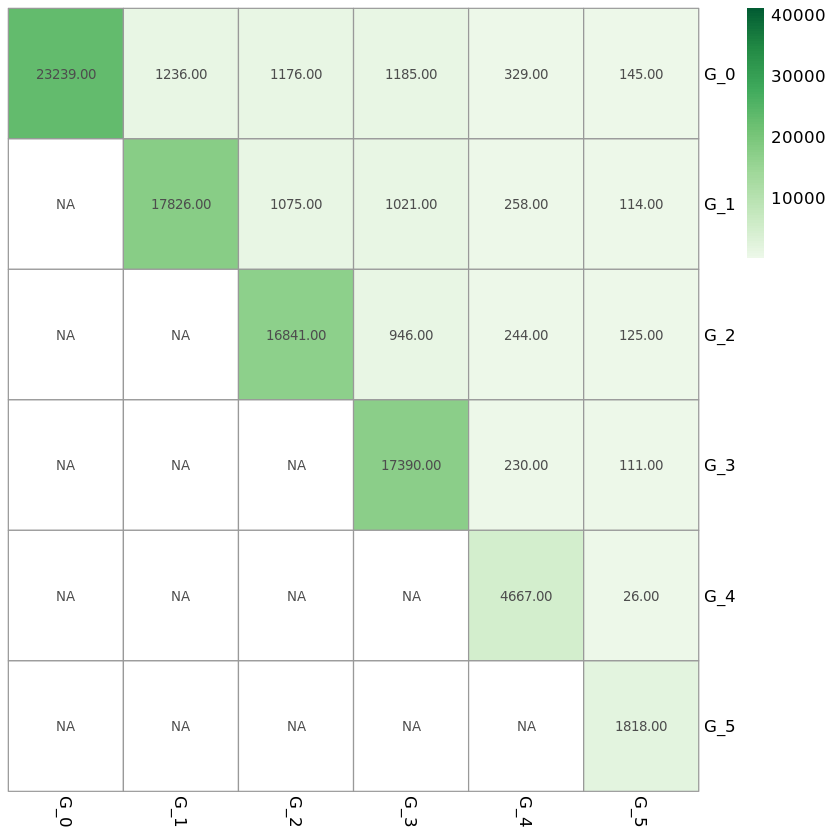

In [18]:
kk2 <- kk
kk2[lower.tri(kk2)] <- NA
mybreaks=seq(min(kk2[1:6,1:6], na.rm = T), max(kk2[1:7,1:7], na.rm = T), length.out = 100)
pheatmap(kk2[1:6,1:6], cluster_rows=F, cluster_cols=F,
         na_col="white", display_numbers = TRUE,
         color =rev(colorRampPalette(rev(brewer.pal(n = 7, name = "Greens")))(length(mybreaks))),
         breaks=mybreaks)

